In [1]:
import pandas as pd
customers = pd.read_csv("data.csv") 
customers.head() 

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


In [2]:
customers.info()
# Data.csv Columns:
#  CustomerID	Gender	Age	Income	SpendingScore

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
customers.describe(include = "all")

,CustomerID,Gender,Age,Income,SpendingScore
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60560.000000,50.200000
std,57.879185,NaN,13.969007,26264.721165,25.823522
min,1.000000,NaN,18.000000,15000.000000,1.000000
25%,50.750000,NaN,28.750000,41500.000000,34.750000
50%,100.500000,NaN,36.000000,61500.000000,50.000000
75%,150.250000,NaN,49.000000,78000.000000,73.000000


In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

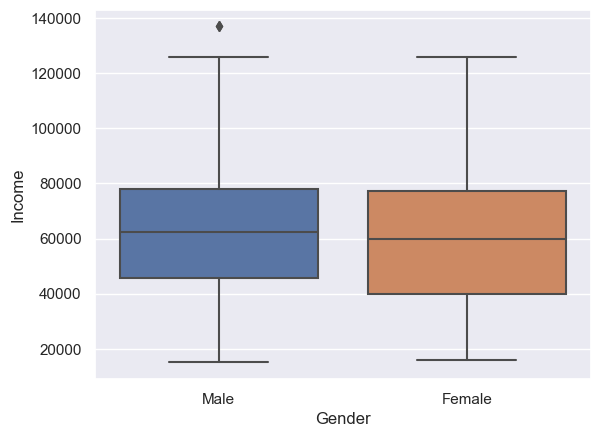

In [5]:
ax = sns.boxplot(

    data = customers, 
    x    = 'Gender', 
    y    = 'Income',  
    palette = 'deep' 


)

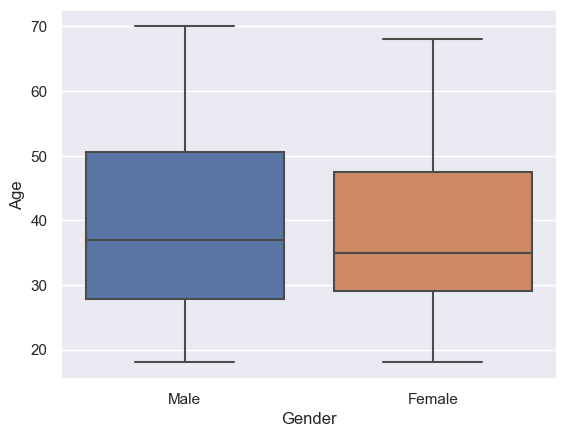

In [6]:
ax = sns.boxplot(data = customers, 
                 x = 'Gender', 
                 y = 'Age', 
                 palette = 'deep')

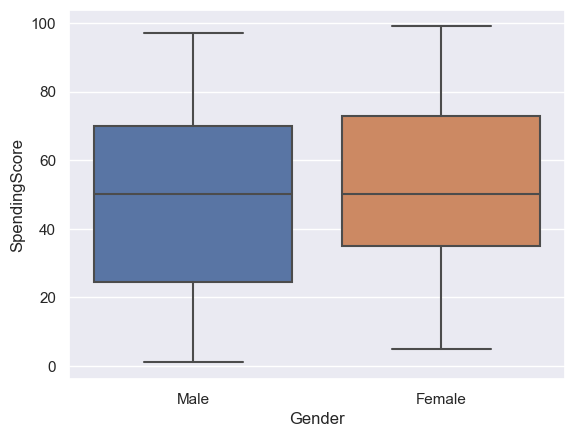

In [7]:
ax = sns.boxplot(data = customers, 
                 x = 'Gender', 
                 y = 'SpendingScore', 
                 palette = 'deep')

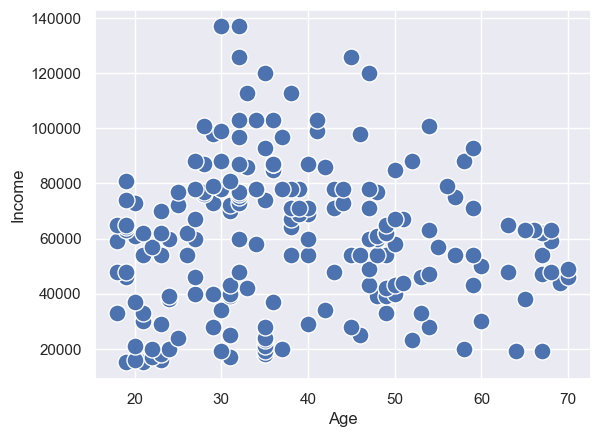

In [8]:
ax = sns.scatterplot(data = customers, 
                     x = 'Age', 
                     y = 'Income',
                     s = 150)

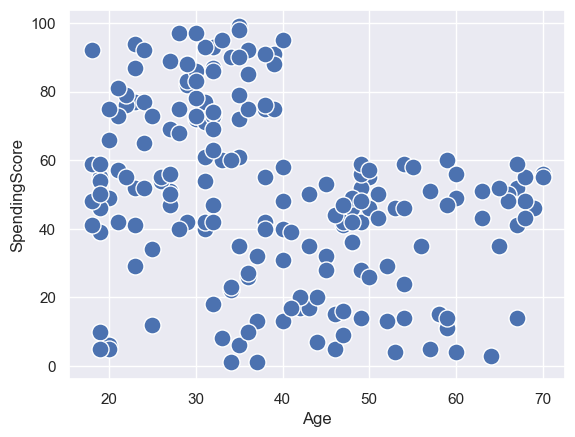

In [9]:
ax = sns.scatterplot(data = customers, 
                     x = 'Age', 
                     y = 'SpendingScore',
                     s = 150)

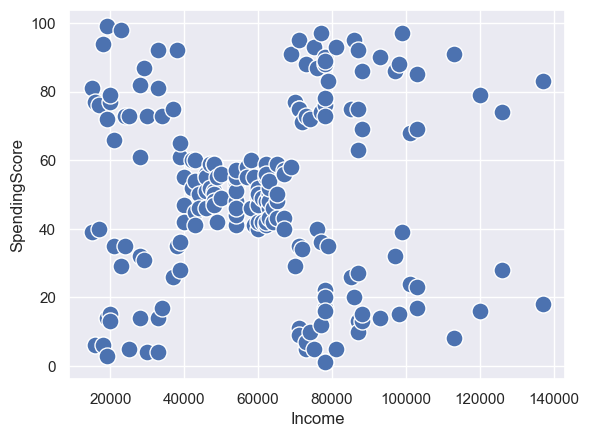

In [10]:
ax = sns.scatterplot(data = customers, 
                     x = 'Income', 
                     y = 'SpendingScore',
                     s = 150)

from all above graphs we can say that Age, Income and SpendingScore are good to use in k-means because they are normally distributed

In [11]:
customers[['Income', 'SpendingScore']].describe().round(2)

,Income,SpendingScore
count,200.00,200.00
mean,60560.00,50.20
std,26264.72,25.82
min,15000.00,1.00
25%,41500.00,34.75
50%,61500.00,50.00
75%,78000.00,73.00
max,137000.00,99.00


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customers_scaled = scaler.fit_transform(customers[['Income', 'SpendingScore']])
customers_scaled = pd.DataFrame(customers_scaled, columns = ['Income', 'SpendingScore'])
customers_scaled.describe().round(2)

,Income,SpendingScore
count,200.00,200.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.74,-1.91
25%,-0.73,-0.60
50%,0.04,-0.01
75%,0.67,0.89
max,2.92,1.89


Creating Clusters with K-Means Clustering

But before we create cluster let's figure out through various methods for choosing the number of clusters. We will use the following methods to choose the number of clusters:

+ The Within Cluster Sum of Squares (WCSS) - Elbow Method
+ The Average Silhouette Method
+ The Calinski-Harabasz Score

In [13]:
from sklearn.cluster import KMeans

### The Within Cluster Sum of Squares (WCSS)

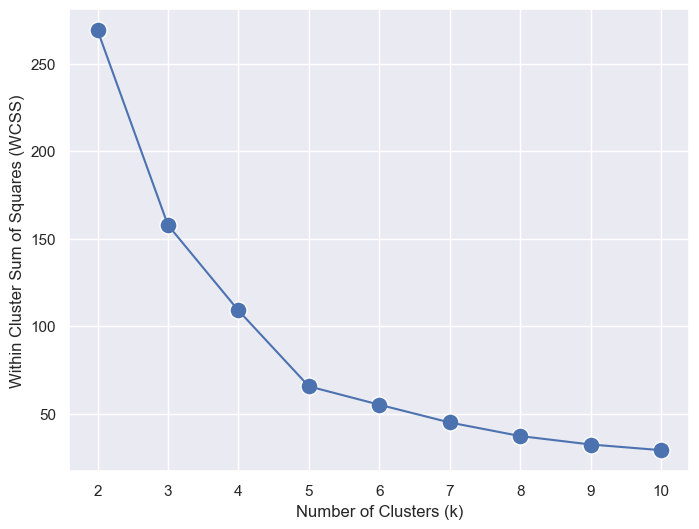

In [14]:
wcss = [] 

for k in range(2, 11): 
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234) 
    km.fit(customers_scaled) 
    wcss.append(km.inertia_) 

wcss_series = pd.Series(wcss, index = range(2, 11)) 


plt.figure(figsize = (8, 6)) 
ax = sns.lineplot(y = wcss_series, x = wcss_series.index) 
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150) 
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Within Cluster Sum of Squares (WCSS)') 


# elbow point is the point after which the within cluster sum of squares doesn't decrease significantly with every iteration, so the optimal number of clusters is the number of clusters at the elbow point, i.e. 5


### The Average Silhouette Score

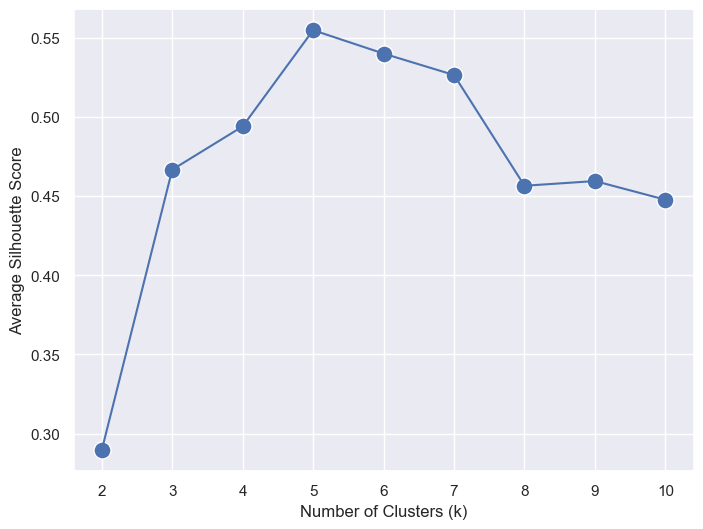

In [15]:
from sklearn.metrics import silhouette_score 

silhouette = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customers_scaled)
    silhouette.append(silhouette_score(customers_scaled, km.labels_))

silhouette_series = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = silhouette_series, x = silhouette_series.index)
ax = sns.scatterplot(y = silhouette_series, x = silhouette_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Average Silhouette Score')

### The Calinski Harabasz Score

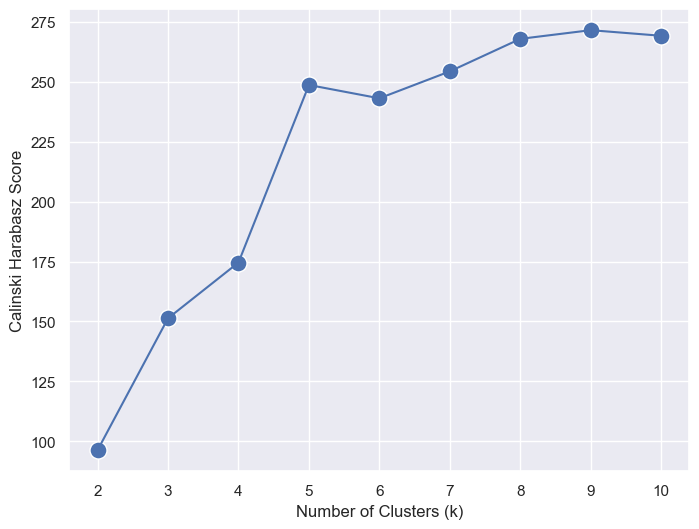

In [16]:
from sklearn.metrics import calinski_harabasz_score 

calinski = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customers_scaled)
    calinski.append(calinski_harabasz_score(customers_scaled, km.labels_))

calinski_series = pd.Series(calinski, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = calinski_series, x = calinski_series.index)
ax = sns.scatterplot(y = calinski_series, x = calinski_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Calinski Harabasz Score')




### Analyze and Interpret the Clusters


In [17]:
km = KMeans(n_clusters=5, n_init = 25, random_state=1234)
km.fit(customers_scaled)
# it finds the optimal values of the centroids.

KMeans(n_clusters=5, n_init=25, random_state=1234)

In [18]:
simpleClusterInfo = pd.Series(km.labels_).value_counts().sort_index()
print(simpleClusterInfo) # return the unique values and sort them in ascending order

0    23
1    35
2    39
3    22
4    81
dtype: int64


In [19]:
cluster_centers = pd.DataFrame(km.cluster_centers_, columns = ['Income', 'SpendingScore'])
print(cluster_centers)

     Income  SpendingScore
0 -1.307519      -1.136965
1  1.055003      -1.284439
2  0.991583       1.239503
3 -1.329545       1.132178
4 -0.200913      -0.026456


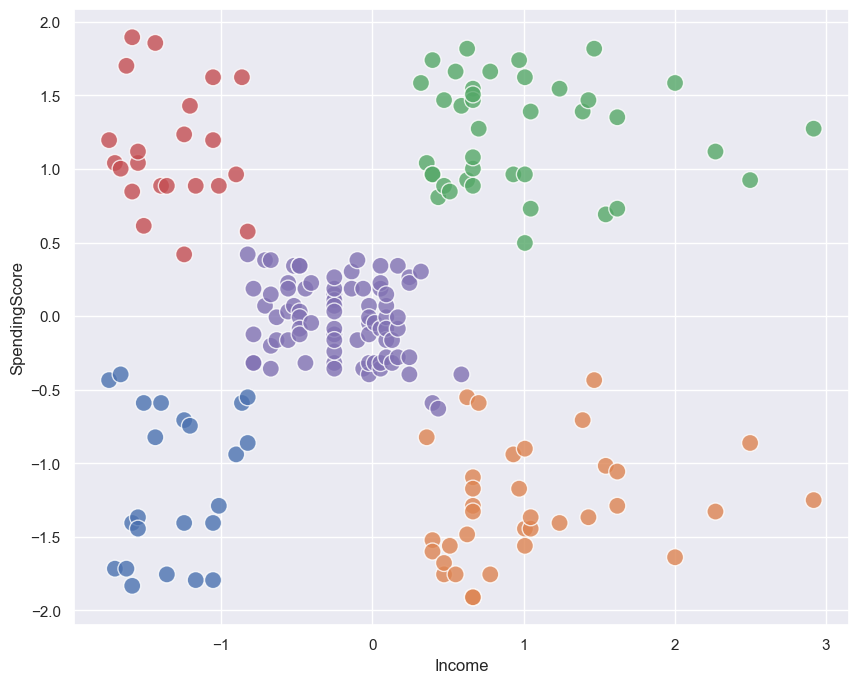

In [20]:
plt.figure(figsize=(10, 8))


ax = sns.scatterplot(data = customers_scaled,
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = km.labels_, 
                     palette = 'deep', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

In [21]:
customers['Cluster'] = km.labels_.tolist()
customers.head(10)

,CustomerID,Gender,Age,Income,SpendingScore,Cluster
0,1,Male,19,15000,39,0
1,2,Male,21,15000,81,3
2,3,Female,20,16000,6,0
3,4,Female,23,16000,77,3
4,5,Female,31,17000,40,0
5,6,Female,22,17000,76,3
6,7,Female,35,18000,6,0
7,8,Female,23,18000,94,3
8,9,Male,64,19000,3,0
9,10,Female,30,19000,72,3


In [22]:
customers = pd.get_dummies(customers, columns = ['Gender'])

In [23]:
customers.groupby('Cluster').agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'}).round(2)


# Conclusion

# Invest in increasing the spending of the high earning low spending customers in cluster 1
# Keep the high earning, high spending customers happy in cluster 2
# keep an watchfuul eye on the low earning, high spending customers in cluster 3
# Invest in increasing the spending of the low earning, low spending customers in cluster 0

# The high earning, low spending customers in cluster 1 are the most profitable customers, so the company should invest in increasing the spending of the high earning low spending customers in cluster 1.

,Gender_Female,Gender_Male,Age,Income,SpendingScore
Cluster,,,,,
0,0.61,0.39,46.0,25000.0,17.0
1,0.46,0.54,42.0,85000.0,16.0
2,0.54,0.46,32.0,79000.0,83.0
3,0.59,0.41,23.5,24500.0,77.0
4,0.59,0.41,46.0,54000.0,50.0
